## Final Project Submission

<center><img src="images/boma_logo.png"/></center>

# Boma Yangu Housing Agency House Price Prediction Model 

**Author:** Nyaoke Brian Antony
* Student pace: Full time
* Scheduled project review date/time: 09/30/2022
* Instructor name: Antony Muiko 
* Blog post URL: [My blog](https://www.linkedin.com/in/africandatascientist/)


## Overview
This project employes the use of variouse Linear Regression modes to try and predict house prices. Linear Regression is used here due to its ability to perform inference statistic giving us more insight and relationship about the data we are working on. The data used to develop this model is the King County House Sales Dataset which is a CSV file
that contains 21597 rows and 21 columns of data.
Each column in the data set represents an atttribute about a house and the target variable Price which we will develp a model to try to predict.<br>

The other 20 colums of this dataset will therefor be used to try and develop an accurate model to help the managers of Boma Yangu Housing Agency predict the price of a house given certain parameters.<br>
We will start developing the model by using a simple liner regressor and continue to explore by incorporating multile linear regressors to increase accuracy of the base model while also adding and removing other features from the model.


## Business Problem

The recent burst in real estate bubble in the country has made may real estate agencies run into multiple losses. This has been particulerly worsened by the inability of some real estate agencie to provide a reasonable price of a given housing unit. These problems has lead to the recent undervaluation and sometimes over valuation of houses more than the current market prices.<br>

Boma Yangu Housing Agency therefor needs a model that  will help them predict the true value of a house not by guessing but by making data driven decissions from already available data.<br>
This model should be accute enough to give a price prediction when certain parameters are fed into the model. This will really help the agency avoids losses by investing  in overpriced houses due to the current bubble and make profit by buying and investing in underpriced houses in the current bubblewhic have a potential of selling at high prices after the bubble burst.


## Data Understanding
The data used to develop this regression model contains house sale prices for King County, which includes Seattle. It includes homes sold between September 9 2014 and January 1 2015

The data set contains 21597 records and 21 attributes.<br>

We will get a better understanding on the data by investgating the column_names.md file found in the data directory which will give us more idea about the data and the attributes in each column as shown below.
### Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

In [135]:
#Import the relevant packages for this module
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [136]:
#Read the metadata contained in the column_names.md
with open('data/column_names.md') as f:
    print(f.read())

# Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type

The data in column_name.md file explains the attribute found in each of the 21 columns found on the dataset<br>
Lets load the data set to confirm 

In [137]:
#Loading the data
data = pd.read_csv('data/kc_house_data.csv' ,index_col=0)

#Get the shape of the data and display the first 3 rows
print(data.shape) 
data.head(3)

(21597, 20)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062


In [138]:
#check the data type of every column
data.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Some of the data in the data set contain object wich  cannot be fed directly to a linear model since they may be categorical values such as the grade column.<br>
The sqft_basement colum seem to have integer values but loaded as an object.

In [139]:
#Check the distribution of the data set that contains integer values
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Preparation

Lets start by cleaning the data set.<br>
Check and fix columns with missing values in the dataset as shown bellow.

In [140]:
#Check fo null values in the dataset
data.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The waterfron and yr_renovated variables have alot of missing data and therefore requre cleaning<br>
The view column too has null values and requres futher action

In [141]:
#check the number of variables lost when removing then null values
d = data.dropna()   
data.shape[0] - d.shape[0]  #thats alot of data signals lost lets try and reduse this

5835

In [142]:
data['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [143]:
# the 63 null vales in the view columns can be replace by one of the categories since it a categorical variable or we can drop it since we will not use it in our model
data.drop('view', axis=1, inplace=True) 


In [144]:
# the waterfront column is also a categorical column and we can therfor replace the missing variables  with the majority column
data['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [145]:
# replace the null values with the majority category since it makes scene to have less houses near a water body
data['waterfront'].fillna("NO", inplace = True)
data['waterfront'].value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [146]:
#Drop the yr_renovated since we will not use this column too in our dataset
data.drop('yr_renovated', axis=1, inplace=True) 

In [147]:
#our data now has no null values
data.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Now we have a clean dataset without missing values

In [148]:
#shape of the new dataset
data.shape

(21597, 18)


lets drop some columns we are not intrested using for the model in like: 

 date, sqft_above, sqft_basement, zipcode, lat, long, sqft_living15, sqft_lot15

In [149]:
#drop unused row for this model
data.drop(['date', 'sqft_above', 'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1, inplace=True)

In [150]:
len(data.columns)

10

In [151]:
#Lets check for correlation with the price column
data.corr()['price']

C:\Users\admin\AppData\Local\Temp\ipykernel_2512\3507670332.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['price']


price          1.000000
bedrooms       0.308787
bathrooms      0.525906
sqft_living    0.701917
sqft_lot       0.089876
floors         0.256804
yr_built       0.053953
Name: price, dtype: float64

C:\Users\admin\AppData\Local\Temp\ipykernel_2512\1389474018.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = data.corr()


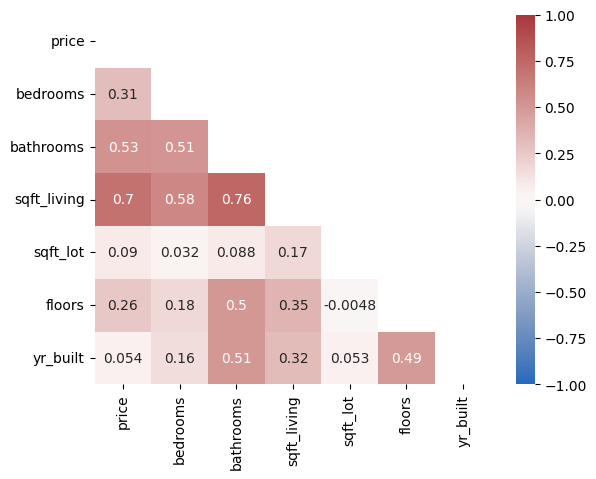

In [152]:
#cvirtualizing the correlation
matrix = data.corr()
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show();

sqft_living  seem to have the highest correlation with the price column <br>
There seem to be a relationship betwen price and size of the house or rooms <br>

## Virtualize the relationship between features and target(house price)

For each numerical feature in the clead data subset create a scatter plot to investigate the leanear relationship with the price variable

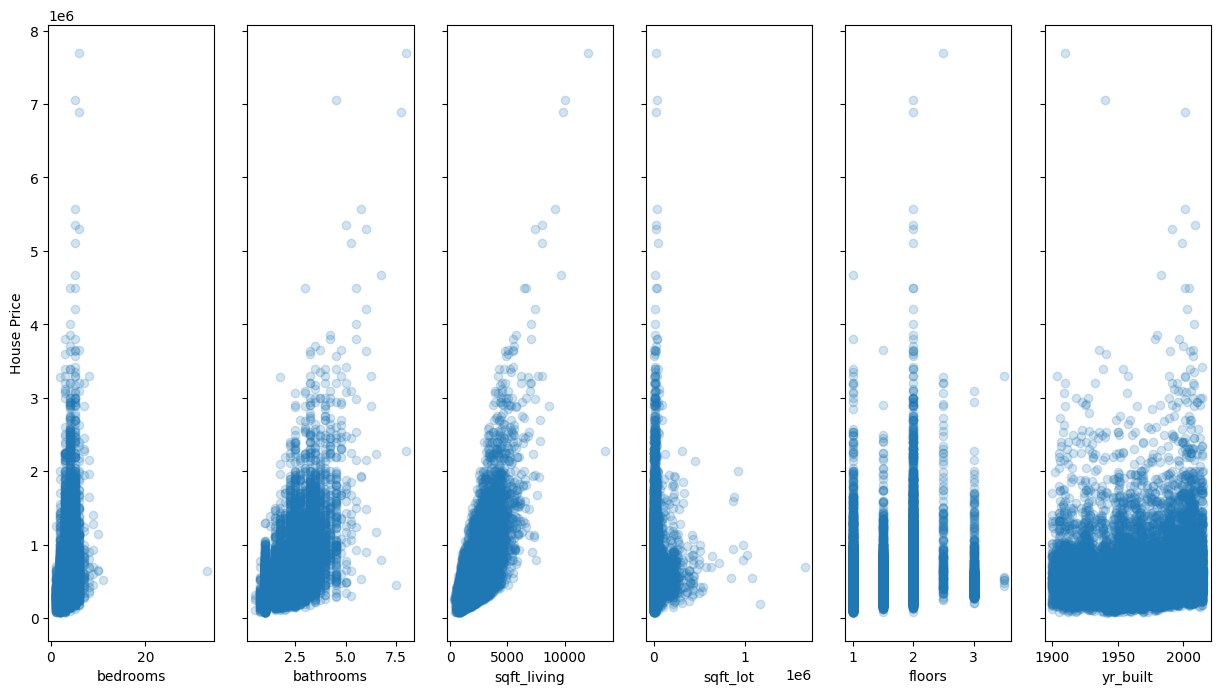

In [153]:
numeric_cols = data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built']]
fig, axes = plt.subplots(ncols=6, figsize=(15,8), sharey=True)
axes[0].set_ylabel('House Price')

for i, col in enumerate(numeric_cols.drop("price", axis=1).columns):
    ax = axes[i]
    ax.scatter(numeric_cols[col], numeric_cols['price'], alpha = 0.2)
    ax.set_xlabel(col)
    


There seem to be some linear relationship with price in bathrooms and sqft_living variables.<br>
The floor variable seem to contain discrete variables and the yr_built column doesnt seeem to produce a good linear relationship with the target variable price.

# DATA MODELING
## Base Model

We will now develop a simple linear regression model from which to improve our model on.<br>
The sqft_living column shows a strong linear correlation with the house price column so we will develop a linear regression model from these two coloumns to see how accurate the model will be.

In [154]:
#set the X varibale to be equal to the independent variable sqft_living and the y dependant variable to be equal to the price coloumn
X = data[['sqft_living']]
y = data['price']

#develop the simple linear regression model

base_model =  sm.OLS(y, sm.add_constant(X)).fit()
print(base_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:00:58   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

This model has a p value less than 0.05 hence its statistically significat but it only explains about 50% of the variance in the target data by a r_squared value of 0.49 hence its not really a good model.<br>
The intercept is 4.4 meaning if we had a room with 0 Square footage of living space the price of the house we would expect is $4.4<br>
The sqft_living coefficient is about 281 meaning for each additional 1 foot of space added in the living room space there is an additonal $281 in the house price. This sugdgests the bigger the living space the more expensive the house price.
Let virtualize the model with Square footage of living space as the predictor

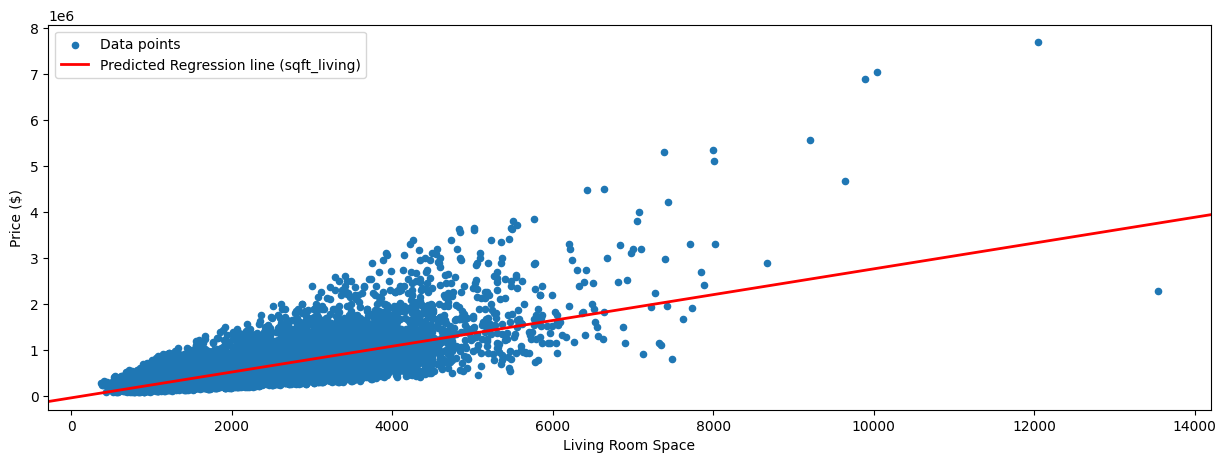

In [155]:
from cProfile import label

from matplotlib.pyplot import scatter, ylabel


fig, ax = plt.subplots(figsize=(15,5))
data.plot(y='price', x='sqft_living', kind='scatter', label= 'Data points', ax=ax, ylabel="Price ($)", xlabel='Living Room Space')
sm.graphics.abline_plot(model_results=base_model, label='Predicted Regression line (sqft_living)', c="red", linewidth=2, ax=ax)
ax.legend()
plt.show()


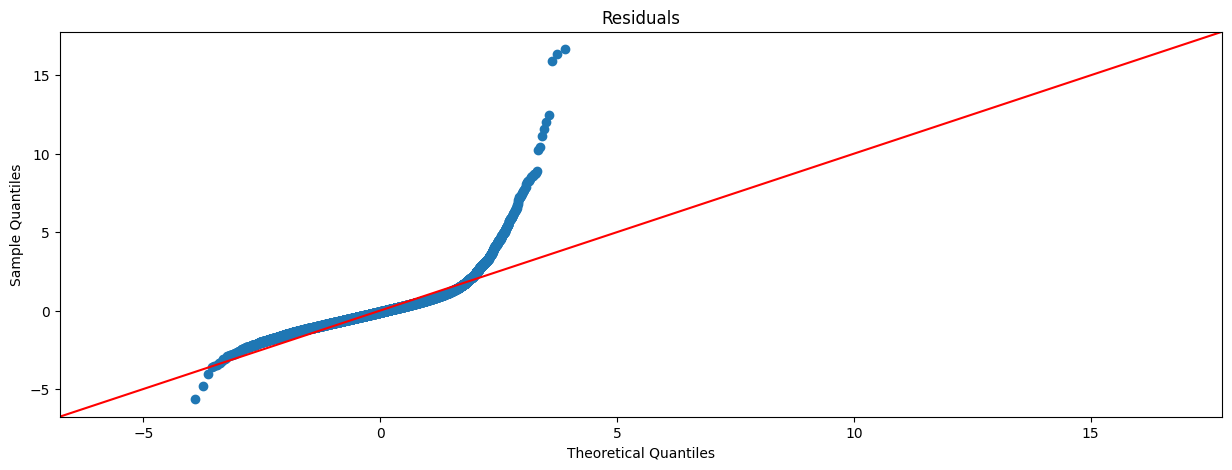

In [156]:
#Plot the residials to see how well the model performes
fig, ax = plt.subplots(figsize=(15,5))
sm.graphics.qqplot(base_model.resid, dist= norm, line='45', fit=True, ax=ax)
ax.set_title('Residuals')
plt.show()

In [157]:
#calculate the mean absolute error of this model
pre_1 = base_model.predict(sm.add_constant(X))
mean_absolute_error(y, pre_1)

173824.8874961748

This show how bad our model is since its affected by the outliers in the sqft_living coloum. This can be attributed to the fact that some large houses are vary expensive relative to the average price of housing.

## Multi Regression 
Lets try and add more features into the module to try and see how goo our model performance will increase<br>
Looking at the correlation mattrix in our previouse code we find that the next value with a higher correlation matrix is bathrooms(0.525906), bedrooms(0.308787), floors(0.256804), sqft_lot (0.089876) and finally yr_built(0.053953)

lets try fitting all these features into our model and see how well it performs relative to the base model above.<br>

This increases our Adj. R-squared value by about 6% indicating an improvement on our model to explain the varience of 6% more of out target variable. The model is also still statistically significan wit a p value less than 0.05

In [158]:
#multi regression with all the data points
X_all = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built']]
multi_model_all = sm.OLS(y, sm.add_constant(X_all)).fit()
print(multi_model_all.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     4511.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:00:59   Log-Likelihood:            -2.9862e+05
No. Observations:               21597   AIC:                         5.972e+05
Df Residuals:                   21590   BIC:                         5.973e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.559e+06   1.35e+05     48.643      

## Create a partial Regression Plots for all the features ploted to see how each perform 

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


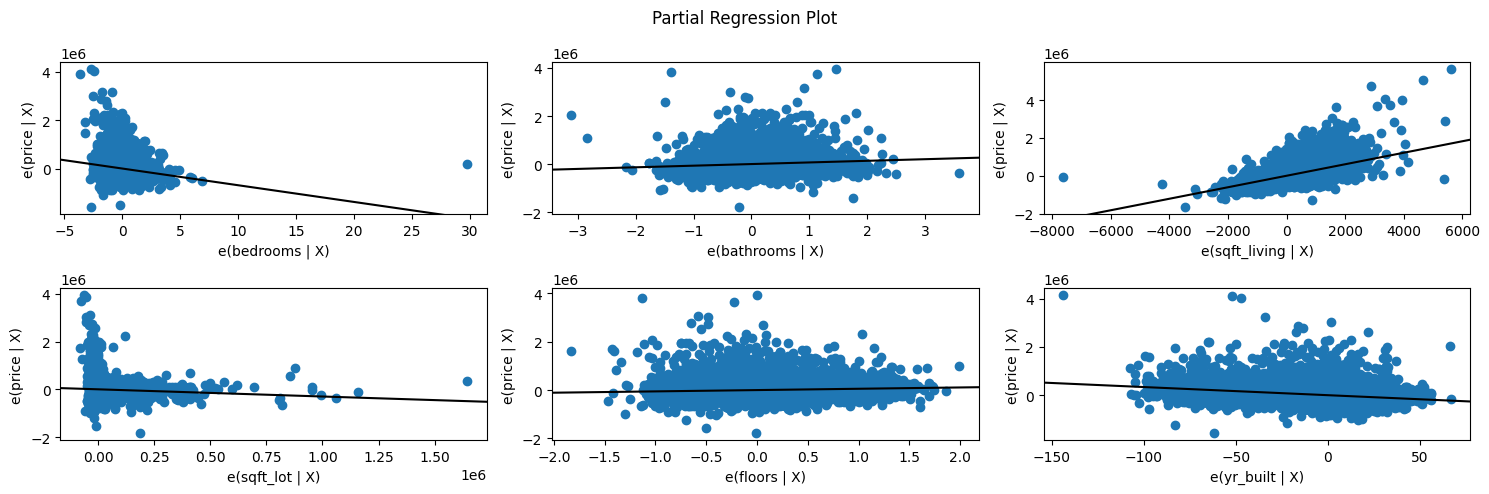

In [159]:
fig = plt.figure(figsize=(15,5))
sm.graphics.plot_partregress_grid(
    multi_model_all,
    exog_idx=list(X_all.columns),
    grid=(2,3),
    fig=fig
)
plt.tight_layout()
plt.show()

In [160]:
#calculate the mean absolute error of this model
pre_2 = multi_model_all.predict(sm.add_constant(X_all))
mean_absolute_error(y, pre_2)

159815.02845193335

## Adding the categorical variables to the model <br>
The model above did not use any categorical variables in the data set. We will use one-hot- encoding to transform the categorical columns to feed them to the model to increase the signal in the data.<br>
Our dataset include 3 categorical columns ['waterfront', 'condition', 'grade']

In [161]:
#view the categorical values
cat_data = data[['waterfront', 'condition', 'grade']]
for col in cat_data.columns:
    print("the categorical values in " + col + " are:")
    print(cat_data[col].value_counts())

the categorical values in waterfront are:
NO     21451
YES      146
Name: waterfront, dtype: int64
the categorical values in condition are:
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64
the categorical values in grade are:
7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64


In [162]:
X_3 = data.drop('price', axis= 1)
X_categorical = pd.get_dummies(X_3, columns=['waterfront', 'condition', 'grade'], drop_first=True)
print(X_3.shape) 
print(X_categorical.shape) #We now have 12 more features in our dataset from 9 to 21
X_categorical

(21597, 9)
(21597, 21)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,waterfront_YES,condition_Fair,condition_Good,condition_Poor,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
id,,,,,,,,,,,,,,,,,,,,,
7129300520,3,1.00,1180,5650,1.0,1955,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6414100192,3,2.25,2570,7242,2.0,1951,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5631500400,2,1.00,770,10000,1.0,1933,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2487200875,4,3.00,1960,5000,1.0,1965,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1954400510,3,2.00,1680,8080,1.0,1987,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,3,2.50,1530,1131,3.0,2009,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6600060120,4,2.50,2310,5813,2.0,2014,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1523300141,2,0.75,1020,1350,2.0,2009,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [163]:
full_model = sm.OLS(y, sm.add_constant(X_categorical)).fit()
print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     2112.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:01:02   Log-Likelihood:            -2.9533e+05
No. Observations:               21597   AIC:                         5.907e+05
Df Residuals:                   21575   BIC:                         5.909e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.416e+06   1

In [164]:
#calculate the mean absolute error of this model
pre_3 = full_model.predict(sm.add_constant(X_categorical))
mean_absolute_error(y, pre_3)

137268.23243934577

The model has greately improved by the inclusion of the categorical variables and and the variance in the taget variable can be explained up to about 67% <br>
The model is also statistically significant with a p value of less than 0.05

In [181]:
open('data/column_names.md', 'r+')

<_io.TextIOWrapper name='data/column_names.md' mode='r+' encoding='cp1252'>

In [195]:
y = None
y= [2,5j,6]
m = map(lambda x:2**x,y)
print(list(m))

[4, (-0.9479239466377266-0.318496768257947j), 64]


In [196]:
2**5

32

In [198]:
[1,2]==[2,1]

False